In [1]:
import numpy as np
import seaborn as sns
import random as rnd
import scipy as sp
import math
from matplotlib import pyplot as plt

# Описание задания
Итак, прямым моделированием покажите выполнение теоремы Гливенко-Кантелли (в “слабом смысле”: со сходимостью по вероятности к нулю).

## Описание подхода к моделированию
Раз нам сказали доказать сходимость по вероятности, то доказываем утверждение 
$$lim_{n \rightarrow \infty}P(sup_{x}(|F_n(x) - F(x)|) \geq \epsilon) = 0$$

Возьмем функцию распределения Гаусса с задаваемыми параметрами, возьмем также какой-нибудь эпсилон, но нужно как-то строить эмпирическую функцию распределения и, более того, считать вероятность. Как же будем это делать?

Во-первых, эмпирическую функцию распределения мы будем строить по реализации набора независимых и одинаково распределенных по Гауссу с нашими параметрами E и D случайных величины. Важно понимать, что эмпирическая функция распределения будет каждый раз разная, даже если количество точек берем одинаковое.

Во-вторых, вероятность будем считать следующим образом: для каждого размера выборки sample_len мы будем строить 48 различных эмпирических функций распределения и считать их максимальное отклонение от теоретической функции распределения, записывая эти величины в массив error. Саму вероятность будем считать как частное количества ячеек в массиве, в которых ошибка больше или равна $\epsilon$, и длины самого массива.

В итоге получится, что для разных длин выборки у нас будет соответствующая вероятность. Ее мы и строим на графике, чтобы убедиться в выполнении теоремы 
Г.-К.

In [7]:
# Параметры нормального распределения
E = 1
D = 2

# Максимальный размер выборки
N = 500

# Максимальная величина ошибки
eps = 10 ** (-1)

In [8]:
# Задаем теоретическую функцию распределения
F_x = np.linspace(E - 3 * math.sqrt(D), E + 3 * math.sqrt(D), 10000)
F_y = [0.5 * (1 + math.erf((x - E) / math.sqrt(2 * D))) for x in F_x]

P = []

# Начинаем считать наши вероятности для увеличивающейся выборки
for sample_len in range(1, N + 1):
    error = []

    # Для каждой длины выборки берем 48 реализаций С.В. и строим по ним эмпирическую Ф.Р.
    for gen in range(1, 50):
        sample = np.random.normal(E, math.sqrt(D), sample_len)
        ECDF_obj = sp.stats.ecdf(sample)
        ECDF = ECDF_obj.cdf.evaluate(F_x)
        error.append(np.max(np.abs(F_y - ECDF)))
    error = np.array(error)

    # И считаем вероятность того, что ошибка больше или равна eps!
    P.append(len(error[error >= eps]) / gen)

Text(0.5, 0, 'Length of sample')

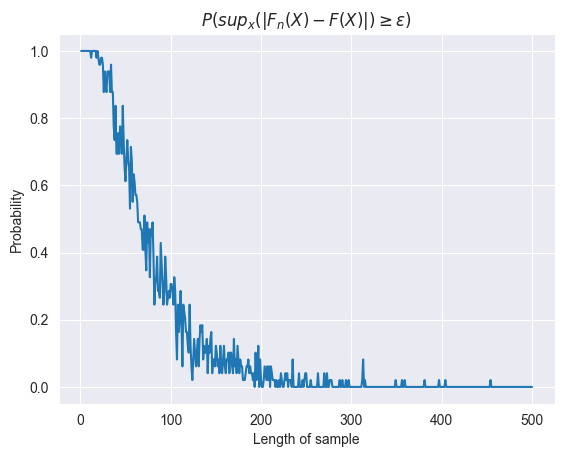

In [9]:
sns.lineplot(x=range(1, N + 1), y=P)

plt.title('$P(sup_{x}(|F_n(X) - F(X)|) \geq \epsilon)$')
plt.ylabel('Probability')
plt.xlabel('Length of sample')